### References

* https://www.cis.fordham.edu/wisdm/includes/files/sensorKDD-2010.pdf
* https://hcis-journal.springeropen.com/articles/10.1186/s13673-017-0097-2

### Libraries

In [44]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.signal import find_peaks
import glob

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

### Test Dataset

In [15]:
data_directory = '../datasets/PAMAP2_Dataset/Protocol/'

list_of_files = glob.glob(data_directory + 'subject*.dat')

dataAll = pd.DataFrame()

for file in list_of_files:
    readData = pd.read_table(file, header=None, sep='\s+')

    data = readData[[0, 1, 4, 5, 6]]
    data.columns = ['timestamp', 'activityID', 'accx', 'accy', 'accz']

    # Extract subject ID from the file name
    subject_id = int(file.split('/')[-1].split('.')[0][7:])
    data['subjectID'] = subject_id

    dataAll = pd.concat([dataAll, data], ignore_index=True)

# drop activityID = 0
df = dataAll.drop(dataAll[dataAll['activityID']==0].index)
df.reset_index(drop = True, inplace = True)

data = df.interpolate(limit_direction = 'both')

data.shape

(1942872, 6)

### Windows Creation

In [17]:
# Input Variables
df = data
accx = 'accx'
accy = 'accy'
accz = 'accz'
activity = 'activityID'

In [26]:
size_raw = data.shape[0]

window_size = 400
step_size = 200

# features based on accx, accy, accz
x_list = []
y_list = []
z_list = []
labels = []

# overlapping windows of size 400 and overlap of 200
for i in range(0, df.shape[0] - window_size, step_size):

   # arrays per axis
   xs = df[accx].values[i: i + window_size]
   ys = df[accy].values[i: i + window_size]
   zs = df[accz].values[i: i + window_size]

   # label with most occurrences in window
   input_array = np.array(df[activity][i: i + window_size], dtype=float)
   label = stats.mode(input_array)[0]

   x_list.append(xs)
   y_list.append(ys)
   z_list.append(zs)
   labels.append(label)

size_transformed = len(x_list)

# convert arrays to pandas series
x_series_td = pd.Series(x_list)
y_series_td = pd.Series(y_list)
z_series_td = pd.Series(z_list)

print(f'Size of raw data {size_raw}')
print(f'Size of transformed data {size_transformed}')
print(f'Ratio {size_raw/size_transformed}')

Size of raw data 1942872
Size of transformed data 9713
Ratio 200.0280037063729


In [20]:
x_list[0:3]

[array([-6.88206, -6.84775, -6.96887, -6.85123, -6.80836, -6.8531 ,
        -6.80969, -6.84641, -6.81531, -6.81397, -6.8113 , -6.8448 ,
        -6.85016, -6.84935, -6.84962, -6.88581, -6.80461, -6.92413,
        -6.84561, -6.77458, -6.81076, -6.77778, -6.81237, -6.844  ,
        -6.7727 , -6.73304, -6.88607, -6.88554, -6.8842 , -6.8818 ,
        -6.80167, -6.9252 , -6.76682, -6.84187, -6.69311, -6.81023,
        -6.77324, -6.89169, -6.8826 , -6.80862, -6.73117, -6.65746,
        -6.76976, -6.69847, -6.84641, -6.84508, -6.95737, -6.87484,
        -6.87859, -6.84989, -6.84267, -6.84935, -6.77244, -6.77297,
        -6.80514, -6.76923, -6.80702, -6.95818, -6.77351, -6.89142,
        -6.84748, -6.84828, -6.88714, -6.78019, -6.81879, -6.8842 ,
        -6.88768, -6.89249, -6.76629, -6.80755, -6.80729, -6.80729,
        -6.85283, -6.96299, -6.80889, -6.95497, -6.70248, -6.87992,
        -6.81263, -6.69552, -6.80996, -6.73171, -6.73465, -6.84615,
        -6.84615, -6.77217, -6.84615, -6.77458, 

In [21]:
pd.Series(x_list[0:3])

0    [-6.88206, -6.84775, -6.96887, -6.85123, -6.80...
1    [-6.88554, -6.73652, -6.73171, -7.00532, -6.92...
2    [-6.70756, -6.77752, -6.66282, -6.73465, -6.62...
dtype: object

In [24]:
# the FFT is symmetrical, so we only need to keep the first half of the signal
fft_size = int((window_size/2))+1

# converting the signals from time domain to frequency domain using FFT
# the first value of the FFT is the DC component, which we don't need
x_series_fft = x_series_td.apply(lambda x: np.abs(np.fft.fft(x))[1:fft_size])
y_series_fft = y_series_td.apply(lambda x: np.abs(np.fft.fft(x))[1:fft_size])
z_series_fft = z_series_td.apply(lambda x: np.abs(np.fft.fft(x))[1:fft_size])

In [29]:
x_series_td[0]

array([-6.88206, -6.84775, -6.96887, -6.85123, -6.80836, -6.8531 ,
       -6.80969, -6.84641, -6.81531, -6.81397, -6.8113 , -6.8448 ,
       -6.85016, -6.84935, -6.84962, -6.88581, -6.80461, -6.92413,
       -6.84561, -6.77458, -6.81076, -6.77778, -6.81237, -6.844  ,
       -6.7727 , -6.73304, -6.88607, -6.88554, -6.8842 , -6.8818 ,
       -6.80167, -6.9252 , -6.76682, -6.84187, -6.69311, -6.81023,
       -6.77324, -6.89169, -6.8826 , -6.80862, -6.73117, -6.65746,
       -6.76976, -6.69847, -6.84641, -6.84508, -6.95737, -6.87484,
       -6.87859, -6.84989, -6.84267, -6.84935, -6.77244, -6.77297,
       -6.80514, -6.76923, -6.80702, -6.95818, -6.77351, -6.89142,
       -6.84748, -6.84828, -6.88714, -6.78019, -6.81879, -6.8842 ,
       -6.88768, -6.89249, -6.76629, -6.80755, -6.80729, -6.80729,
       -6.85283, -6.96299, -6.80889, -6.95497, -6.70248, -6.87992,
       -6.81263, -6.69552, -6.80996, -6.73171, -6.73465, -6.84615,
       -6.84615, -6.77217, -6.84615, -6.77458, -6.85016, -6.77

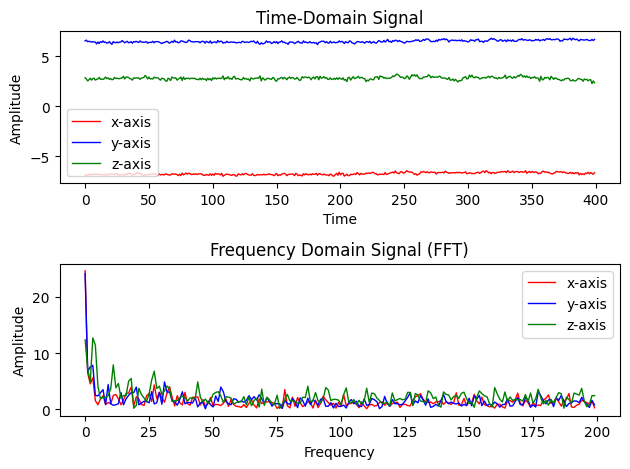

In [56]:
# Plot the first time-domain signal
plt.subplot(2, 1, 1)
sns.lineplot(data=x_series_td[0], color='r', linestyle='-', linewidth=1, label='x-axis')
sns.lineplot(data=y_series_td[0], color='b', linestyle='-', linewidth=1, label='y-axis')
sns.lineplot(data=z_series_td[0], color='g', linestyle='-', linewidth=1, label='z-axis')
plt.title('Time-Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the first frequency-domain signal
plt.subplot(2, 1, 2)
sns.lineplot(data=x_series_fft[0], color='r', linestyle='-', linewidth=1, label='x-axis')
sns.lineplot(data=y_series_fft[0], color='b', linestyle='-', linewidth=1, label='y-axis')
sns.lineplot(data=z_series_fft[0], color='g', linestyle='-', linewidth=1, label='z-axis')
plt.title('Frequency Domain Signal (FFT)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### Features Calculation

In [ ]:
X = pd.DataFrame()
y = np.array(labels)
y = y.astype(int)

for tp in ['td', 'fft']:

    for axis in ['x','y','z']:
        
        series = locals()[f'{axis}_series_{tp}']

        ################## simple statistics features ##################
        # mean
        X[f'{axis}_mean_{tp}'] = series.apply(lambda x: x.mean())
        # mean abs diff
        X[f'{axis}_meandiff_{tp}'] = series.apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
        # min
        X[f'{axis}_min_{tp}'] = series.apply(lambda x: x.min())
        # max
        X[f'{axis}_max_{tp}'] = series.apply(lambda x: x.max())     
        # max-min diff
        X[f'{axis}_minmax_{tp}'] = X[f'{axis}_max_{tp}'] - X[f'{axis}_min_{tp}']
        # median
        X[f'{axis}_median_{tp}'] = series.apply(lambda x: np.median(x))
        # median abs diff 
        X[f'{axis}_mediandiff_{tp}'] = series.apply(lambda x: np.median(np.absolute(x - np.median(x))))
        # std dev
        X[f'{axis}_std_{tp}'] = series.apply(lambda x: x.std())
        # interquartile range
        X[f'{axis}_quart_{tp}'] = series.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

        # indexes
        # index of min value in window
        if tp == 'td':
            X[f'{axis}_argmin_{tp}'] = series.apply(lambda x: np.argmin(x))
            # index of max value in window
            X[f'{axis}_argmax_{tp}'] = series.apply(lambda x: np.argmax(x))
        else:
            X[f'{axis}_argmin_{tp}'] = series.apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:fft_size]))
            # index of max value in window
            X[f'{axis}_argmax_{tp}'] = series.apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:fft_size]))
        
        # abs max-min index diff
        X[f'{axis}_minmaxarg_{tp}'] = abs(X[f'{axis}_argmax_{tp}'] - X[f'{axis}_argmin_{tp}'])
        
        # only for time domain
        if tp == 'td':                
            # negtive values count
            X[f'{axis}_negatives_{tp}'] = series.apply(lambda x: np.sum(x < 0))
            # positive values count
            X[f'{axis}_positives_{tp}'] = series.apply(lambda x: np.sum(x > 0))
        
        # values above mean
        X[f'{axis}_meanabove_{tp}'] = series.apply(lambda x: np.sum(x > x.mean()))
        # skewness
        X[f'{axis}_skewness_{tp}'] = series.apply(lambda x: stats.skew(x))
        # kurtosis
        X[f'{axis}_kurtosis_{tp}'] = series.apply(lambda x: stats.kurtosis(x))

        ################## signal based features ##################
        # count peaks in signal
        X[f'{axis}_peaks_{tp}'] = series.apply(lambda x: len(find_peaks(x)[0]))
        # power of signal: average of the squared signal
        X[f'{axis}_power_{tp}'] = series.apply(lambda x: np.mean(x**2))
    
    # over all axis
    seriesx = locals()[f'x_series_{tp}']
    seriesy = locals()[f'y_series_{tp}']
    seriesz = locals()[f'z_series_{tp}']

    # signal magnitude area
    X[f'SMA_{tp}'] = seriesx.apply(lambda x: np.mean(abs(x))) + seriesy.apply(lambda x: np.mean(abs(x))) + seriesz.apply(lambda x: np.mean(abs(x)))

    # average resultant acceleration
    X[f'avg_resultant_acc_{tp}'] = [i.mean() for i in ((seriesx**2 + seriesy**2 + seriesz**2)**0.5)]

In [60]:
print(f'The shape of transformed dataset is {X.shape}')

The shape of transformed dataset is (9713, 112)


In [59]:
X.head(20)

,x_mean_td,x_meandiff_td,x_min_td,x_max_td,x_minmax_td,x_median_td,x_mediandiff_td,x_std_td,x_quart_td,x_argmin_td,...,z_argmin_fft,z_argmax_fft,z_minmaxarg_fft,z_meanabove_fft,z_skewness_fft,z_kurtosis_fft,z_peaks_fft,z_power_fft,SMA_fft,avg_result_accl_fft
0,-6.761650,0.100057,-7.028140,-6.45996,0.568180,-6.772970,0.081725,0.120069,0.187805,108,...,169,0,169,74,3.266977,15.186295,62,8.245535,5.409880,3.408979
1,-6.798013,0.140386,-7.258080,-6.45996,0.798120,-6.774175,0.119520,0.167475,0.265193,338,...,157,0,157,66,5.103593,38.282099,63,12.327176,6.030676,3.774990
2,-6.951531,0.100627,-7.269850,-6.62476,0.645090,-6.958975,0.080925,0.125651,0.179453,230,...,29,0,29,82,3.073025,12.671809,68,9.843497,6.198853,3.873755
3,-6.497086,1.231610,-10.366100,-1.73866,8.627440,-6.962320,0.160245,1.706190,0.551715,348,...,106,0,106,28,8.784122,84.605502,70,8312.952402,46.147124,30.770871
4,-7.301601,2.138345,-19.530900,-1.73866,17.792240,-7.113860,1.517010,3.038117,3.050475,307,...,81,0,81,47,10.747270,130.928104,55,8989.854811,86.381042,54.778396
5,-4.252117,5.688214,-19.530900,12.19080,31.721700,-6.948070,2.513205,6.849855,9.957460,107,...,100,0,100,49,6.241699,49.112503,64,5543.179351,125.120173,79.560086
6,3.595096,4.920787,-10.817600,15.30500,26.122600,6.887065,0.996340,6.021386,5.767435,45,...,140,0,140,48,3.448837,14.307888,59,1305.042819,103.348948,67.187670
7,7.035281,0.289870,0.903636,15.30500,14.401364,6.988605,0.075580,0.916307,0.150970,0,...,99,198,99,54,2.232503,5.300428,58,218.696178,33.798584,21.517687
8,6.956706,0.069649,6.719940,7.29159,0.571650,6.952020,0.044605,0.090277,0.111300,142,...,17,134,117,89,0.614187,0.161627,66,4.162837,5.186472,3.299413
9,6.956087,0.072444,6.721810,7.29159,0.569780,6.952420,0.070900,0.092306,0.138725,66,...,85,0,85,94,0.556623,-0.107177,63,4.251565,5.229374,3.354555
